### Importación de datos



In [2]:
import pandas as pd

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 100)


In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
# Combinar todos los dataframes de las tiendas y añadir una columna de tienda donde indique el nombre de la tienda
tienda = pd.read_csv(url)
tienda['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los CSV
df_combined = pd.concat(
    [tienda, tienda2, tienda3, tienda4],
    ignore_index=True
)

print(df_combined.head())

print(df_combined.info())

            Producto Categoría del Producto    Precio  Costo de envío Fecha de Compra         Vendedor Lugar de Compra  Calificación      Método de pago  Cantidad de cuotas       lat       lon    Tienda
0  Asistente virtual           Electrónicos  164300.0          6900.0      16/01/2021      Pedro Gomez          Bogotá             4  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1
1    Mesa de comedor                Muebles  192300.0          8400.0      18/05/2022  Beatriz Morales        Medellín             1  Tarjeta de crédito                   4   6.25184 -75.56359  Tienda 1
2      Juego de mesa               Juguetes  209600.0         15900.0      15/03/2021   Juan Fernandez       Cartagena             1  Tarjeta de crédito                   1  10.39972 -75.51444  Tienda 1
3         Microondas      Electrodomésticos  757500.0         41000.0      03/05/2022   Juan Fernandez            Cali             4               Nequi                   1   3.43722 -76.5

#1. Análisis de facturación



In [5]:
# Determinar el ingreso total de cada tienda en formato con dos decimales
ingreso_total_tienda = df_combined.groupby('Tienda')['Precio'].sum()
print(ingreso_total_tienda)

ingreso_total_tienda_mm = (df_combined
                           .groupby('Tienda')['Precio']
                           .sum()
                           .div(1_000_000)
                           .round(2)
                           .astype(str) + " MM")
print(ingreso_total_tienda_mm)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64
Tienda
Tienda 1    1150.88 MM
Tienda 2    1116.34 MM
Tienda 3    1098.02 MM
Tienda 4    1038.38 MM
Name: Precio, dtype: object


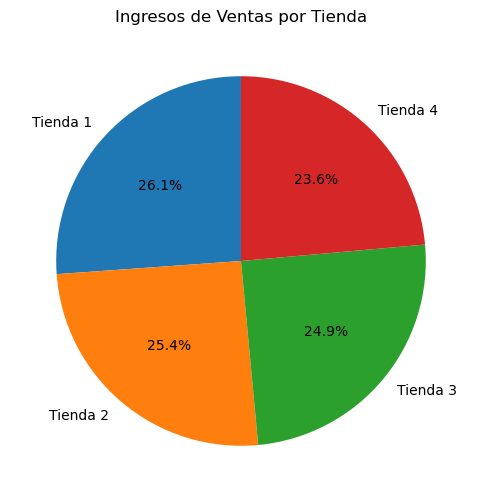

In [6]:
# Crear un grafico circular del porcentaje de ventas por tienda
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ingreso_total_tienda.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Ingresos de Ventas por Tienda")
plt.ylabel("")
plt.show()


In [7]:
# Determinar el valor de las ventas por año y tienda

df_combined['Fecha de Compra'] = pd.to_datetime(df_combined['Fecha de Compra'], dayfirst=True)
df_combined['Año'] = df_combined['Fecha de Compra'].dt.year
df_combined['Mes'] = df_combined['Fecha de Compra'].dt.month

valor_ventas_año_tienda = (df_combined
                           .groupby(['Tienda', 'Año'])['Precio']
                           .sum()
                           .reset_index()
                           .pivot(
                               index='Tienda',
                               columns='Año',
                               values='Precio'
                           )
                           )

valor_ventas_año_tienda_porct = valor_ventas_año_tienda.div(valor_ventas_año_tienda.sum(axis=0), axis=1)

print(valor_ventas_año_tienda)
print(valor_ventas_año_tienda_porct)


Año              2020         2021         2022         2023
Tienda                                                      
Tienda 1  368933200.0  362120800.0  316565600.0  103260800.0
Tienda 2  320466600.0  351215500.0  358226500.0   86434900.0
Tienda 3  321707500.0  362954400.0  350438300.0   62919400.0
Tienda 4  330847700.0  347823600.0  302221500.0   57482900.0
Año           2020      2021      2022      2023
Tienda                                          
Tienda 1  0.274922  0.254278  0.238476  0.332994
Tienda 2  0.238806  0.246620  0.269860  0.278734
Tienda 3  0.239730  0.254863  0.263993  0.202902
Tienda 4  0.246542  0.244239  0.227670  0.185370


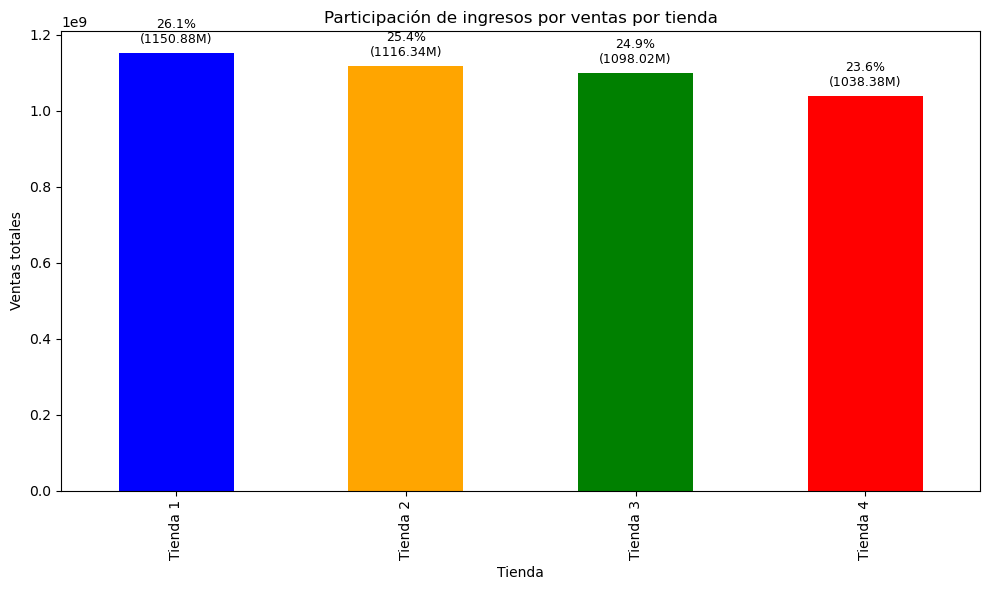

In [8]:
# Grafico 
# Agrupar datos
ventas_tienda = df_combined.groupby('Tienda')['Precio'].sum()

total = ventas_tienda.sum()
porcentajes = ventas_tienda / total * 100

# Gráfico
ax = ventas_tienda.plot(
    kind='bar',
    color=['blue', 'orange', 'green', 'red'],
    figsize=(10, 6)
)

ax.set_title('Participación de ingresos por ventas por tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Ventas totales')

# Añadir etiquetas
for i, (valor, pct) in enumerate(zip(ventas_tienda, porcentajes)):
    ax.annotate(
        f'{pct:.1f}%\n({valor/1e6:.2f}M)',
        xy=(i, valor),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


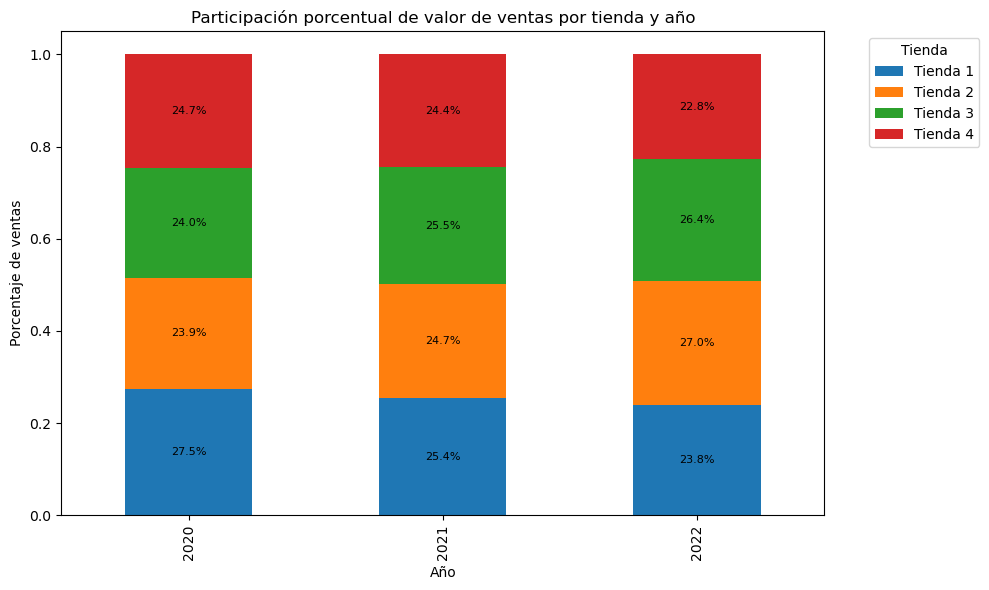

In [9]:
# Crear grafico de barras apiladas al 100% por año

ax = valor_ventas_año_tienda_porct.T.iloc[:-1, :].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

ax.set_title('Participación porcentual de valor de ventas por tienda y año')
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje de ventas')

ax.legend(
    title='Tienda',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v*100:.1f}%' if v > 0 else '' for v in container.datavalues],
        label_type='center',
        fontsize=8
    )
plt.show()

In [10]:
# Determinar la variación anual neta y porcentual del valor de las ventas de cada tienda
variacion_absoluta = valor_ventas_año_tienda.iloc[:,:-1].diff(axis=1)
variacion_porcentual = valor_ventas_año_tienda.iloc[:,:-1].pct_change(axis=1) * 100

tabla_variacion = pd.concat(
    [
        variacion_absoluta.add_suffix(' Δ'),
        variacion_porcentual.add_suffix(' %')
    ],
    axis=1
).round(2)

print(tabla_variacion)

print(pd.DataFrame(tabla_variacion))

Año       2020 Δ      2021 Δ      2022 Δ  2020 %  2021 %  2022 %
Tienda                                                          
Tienda 1     NaN  -6812400.0 -45555200.0     NaN   -1.85  -12.58
Tienda 2     NaN  30748900.0   7011000.0     NaN    9.60    2.00
Tienda 3     NaN  41246900.0 -12516100.0     NaN   12.82   -3.45
Tienda 4     NaN  16975900.0 -45602100.0     NaN    5.13  -13.11
Año       2020 Δ      2021 Δ      2022 Δ  2020 %  2021 %  2022 %
Tienda                                                          
Tienda 1     NaN  -6812400.0 -45555200.0     NaN   -1.85  -12.58
Tienda 2     NaN  30748900.0   7011000.0     NaN    9.60    2.00
Tienda 3     NaN  41246900.0 -12516100.0     NaN   12.82   -3.45
Tienda 4     NaN  16975900.0 -45602100.0     NaN    5.13  -13.11


      Tienda   Año  Variacion
0   Tienda 1  2020        NaN
1   Tienda 2  2020        NaN
2   Tienda 3  2020        NaN
3   Tienda 4  2020        NaN
4   Tienda 1  2021  -1.846513
5   Tienda 2  2021   9.595040
6   Tienda 3  2021  12.821243
7   Tienda 4  2021   5.131032
8   Tienda 1  2022 -12.580111
9   Tienda 2  2022   1.996210
10  Tienda 3  2022  -3.448395
11  Tienda 4  2022 -13.110697


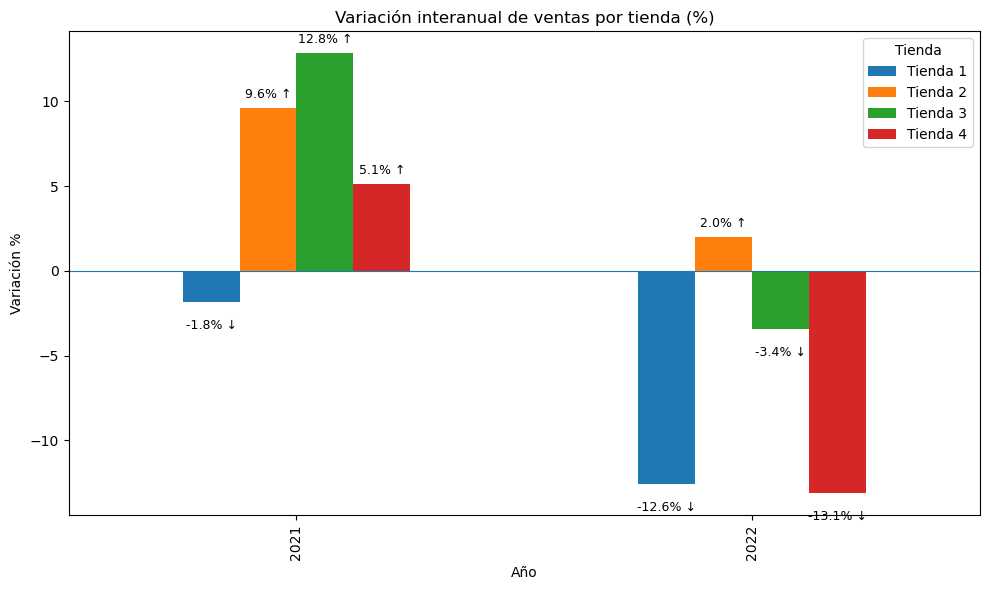

In [11]:
import numpy as np
# Gráfico de barras — transformar y visualizar la variación porcentual interanual por tienda
df_melt = variacion_porcentual.reset_index().melt(
    id_vars='Tienda',
    var_name='Año',
    value_name='Variacion'
)

print(df_melt)

# Pivot para obtener columnas por tienda y filas por año, luego graficar
df_plot = df_melt[df_melt['Año'] != 2020].pivot(index='Año', columns='Tienda', values='Variacion')

ax = df_plot.plot(kind='bar', figsize=(10, 6))

ax.set_title('Variación interanual de ventas por tienda (%)')
ax.set_xlabel('Año')
ax.set_ylabel('Variación %')
ax.axhline(0, linewidth=0.8)

# Añadir etiquetas con flechas
for container in ax.containers:
    for bar in container:
        height = bar.get_height()

        if np.isnan(height):
            continue

        # Flecha según signo
        arrow = '↑' if height > 0 else '↓'
        label = f'{height:.1f}% {arrow}'

        ax.annotate(
            label,
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5 if height > 0 else -12),
            textcoords='offset points',
            ha='center',
            va='bottom' if height > 0 else 'top',
            fontsize=9
        )

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [12]:
# Determinar el valor de ventas por categoría de producto en cada tienda
ventas_categoria_tienda1 = (df_combined[df_combined['Tienda'] == 'Tienda 1']
                            .groupby('Categoría del Producto')['Precio']
                            .sum()
                            .round(2))

ventas_categoria_tienda2 = (df_combined[df_combined['Tienda'] == 'Tienda 2']
                            .groupby('Categoría del Producto')['Precio']
                            .sum()
                            .round(2))

ventas_categoria_tienda3 = (df_combined[df_combined['Tienda'] == 'Tienda 3']
                            .groupby('Categoría del Producto')['Precio']
                            .sum()
                            .round(2))

ventas_categoria_tienda4 = (df_combined[df_combined['Tienda'] == 'Tienda 4']
                            .groupby('Categoría del Producto')['Precio']
                            .sum()
                            .round(2))


# Crear una tabla resumen del valor de las ventas por categoría en cada tienda y añadir una columna total

resumen_ventas = pd.DataFrame({ 'Tienda 1': ventas_categoria_tienda1,
                                'Tienda 2': ventas_categoria_tienda2,
                                'Tienda 3': ventas_categoria_tienda3,
                                'Tienda 4': ventas_categoria_tienda4
                              })
resumen_ventas['Total'] = resumen_ventas.sum(axis=1)
print('Resumen de Ventas por Categoría y Tienda (MM):')
print(resumen_ventas.div(1_000_000).round(2).astype(str) )

Resumen de Ventas por Categoría y Tienda (MM):
                        Tienda 1 Tienda 2 Tienda 3 Tienda 4    Total
Categoría del Producto                                              
Artículos para el hogar     12.7    14.75    15.06    15.07    57.58
Deportes y diversión       39.29    34.74    35.59    33.35   142.98
Electrodomésticos         363.69   348.57   329.24   283.26  1324.75
Electrónicos              429.49   410.83   410.78   409.48  1660.58
Instrumentos musicales      91.3   104.99    77.38     75.1   348.77
Juguetes                    18.0    15.95     19.4    20.26     73.6
Libros                      8.78    10.09      9.5     9.32     37.7
Muebles                   187.63   176.43   201.07   192.53   757.66


In [13]:
# Normalizar la tabla resumen de ventas
resumen_ventas_normalizado = resumen_ventas.div(resumen_ventas.sum(axis=0), axis=1)
print("\nResumen de ventas por categoría en cada tienda (normalizado):")
print(resumen_ventas_normalizado)


Resumen de ventas por categoría en cada tienda (normalizado):
                         Tienda 1  Tienda 2  Tienda 3  Tienda 4     Total
Categoría del Producto                                                   
Artículos para el hogar  0.011034  0.013210  0.013716  0.014517  0.013076
Deportes y diversión     0.034139  0.031123  0.032416  0.032118  0.032468
Electrodomésticos        0.316006  0.312241  0.299847  0.272792  0.300832
Electrónicos             0.373187  0.368015  0.374106  0.394343  0.377094
Instrumentos musicales   0.079330  0.094048  0.070473  0.072327  0.079201
Juguetes                 0.015636  0.014284  0.017669  0.019513  0.016715
Libros                   0.007633  0.009040  0.008651  0.008977  0.008560
Muebles                  0.163035  0.158039  0.183123  0.185414  0.172054


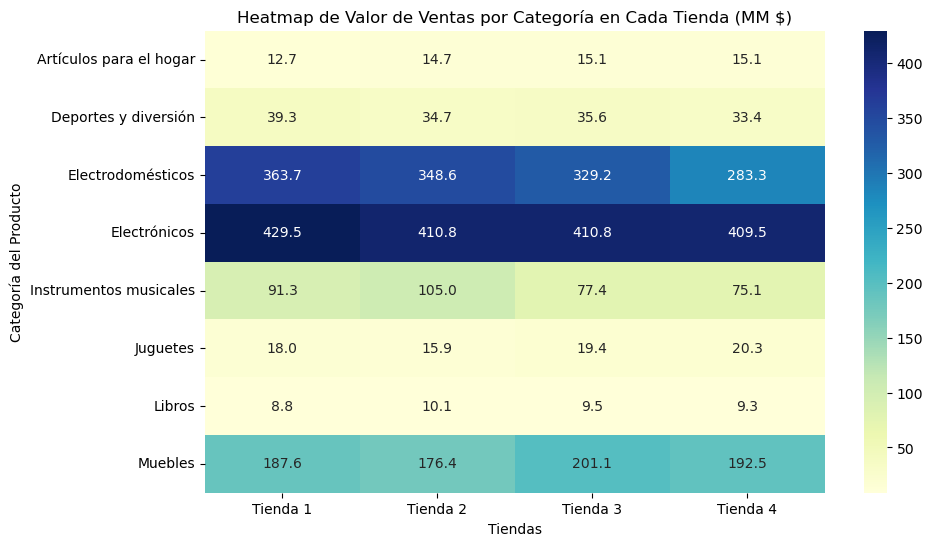

In [14]:
# Crear un heatmap para visualizar las ventas por categoría en cada tienda
import seaborn as sns
plt.figure(figsize=(10, 6))
# El formato de de las anotaciones en porcentaje
sns.heatmap(resumen_ventas.iloc[:, :-1].div(1_000_000), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap de Valor de Ventas por Categoría en Cada Tienda (MM $)")
plt.xlabel("Tiendas")
plt.ylabel("Categoría del Producto")
plt.show()


In [15]:
# Determinar la cantidad de ventas por cateogoría en cada tienda
cantidad_ventas_categoria_tienda1 = (df_combined[df_combined['Tienda'] == 'Tienda 1']
                                     .groupby('Categoría del Producto').size()
                                     .rename('Cantidad de Ventas'))

cantidad_ventas_categoria_tienda2 = (df_combined[df_combined['Tienda'] == 'Tienda 2']
                                     .groupby('Categoría del Producto').size()
                                     .rename('Cantidad de Ventas'))
cantidad_ventas_categoria_tienda3 = (df_combined[df_combined['Tienda'] == 'Tienda 3']
                                        .groupby('Categoría del Producto').size()
                                        .rename('Cantidad de Ventas'))
cantidad_ventas_categoria_tienda4 = (df_combined[df_combined['Tienda'] == 'Tienda 4']
                                        .groupby('Categoría del Producto').size()
                                        .rename('Cantidad de Ventas'))
# Crear una tabla resumen de la cantidad de ventas por categoría en cada tienda y añadir una columna total
resumen_cantidad_ventas = pd.DataFrame({ 'Tienda 1': cantidad_ventas_categoria_tienda1,
                                        'Tienda 2': cantidad_ventas_categoria_tienda2,
                                        'Tienda 3': cantidad_ventas_categoria_tienda3,
                                        'Tienda 4': cantidad_ventas_categoria_tienda4
                                      })
resumen_cantidad_ventas['Total'] = resumen_cantidad_ventas.sum(axis=1)
print('Resumen de Cantidad de Ventas por Categoría y Tienda:')
print(resumen_cantidad_ventas)


Resumen de Cantidad de Ventas por Categoría y Tienda:
                         Tienda 1  Tienda 2  Tienda 3  Tienda 4  Total
Categoría del Producto                                                
Artículos para el hogar       171       181       177       201    730
Deportes y diversión          284       275       277       277   1113
Electrodomésticos             312       305       278       254   1149
Electrónicos                  448       422       451       451   1772
Instrumentos musicales        182       224       177       170    753
Juguetes                      324       313       315       338   1290
Libros                        173       197       185       187    742
Muebles                       465       442       499       480   1886


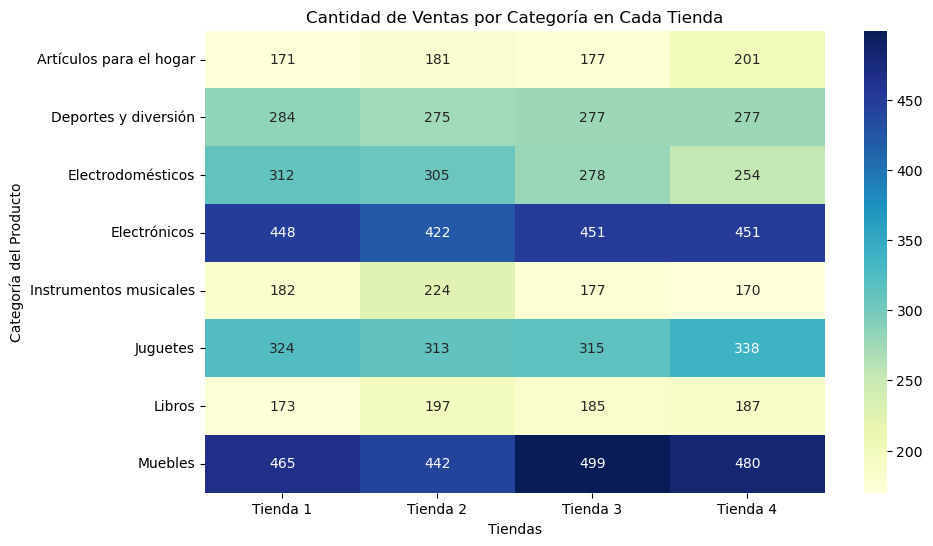

In [16]:
# Crear un heatmap sobre cantidad de ventas por categoría y tienda

plt.figure(figsize=(10, 6))
sns.heatmap(resumen_cantidad_ventas.iloc[:, :-1], annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Cantidad de Ventas por Categoría en Cada Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Categoría del Producto")
plt.show()

In [17]:
# Composición de las ventas por categoría
ingreso_total_categoria = df_combined.groupby('Categoría del Producto')['Precio'].sum()
print(ingreso_total_categoria)

ingreso_total_categoria_mm = (df_combined
                           .groupby('Categoría del Producto')['Precio']
                           .sum()
                           .div(1_000_000)
                           .round(2)
                           .astype(str) + " MM")
print(ingreso_total_categoria_mm)

Categoría del Producto
Artículos para el hogar    5.757980e+07
Deportes y diversión       1.429777e+08
Electrodomésticos          1.324751e+09
Electrónicos               1.660576e+09
Instrumentos musicales     3.487726e+08
Juguetes                   7.360440e+07
Libros                     3.769610e+07
Muebles                    7.576610e+08
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar      57.58 MM
Deportes y diversión        142.98 MM
Electrodomésticos          1324.75 MM
Electrónicos               1660.58 MM
Instrumentos musicales      348.77 MM
Juguetes                      73.6 MM
Libros                        37.7 MM
Muebles                     757.66 MM
Name: Precio, dtype: object


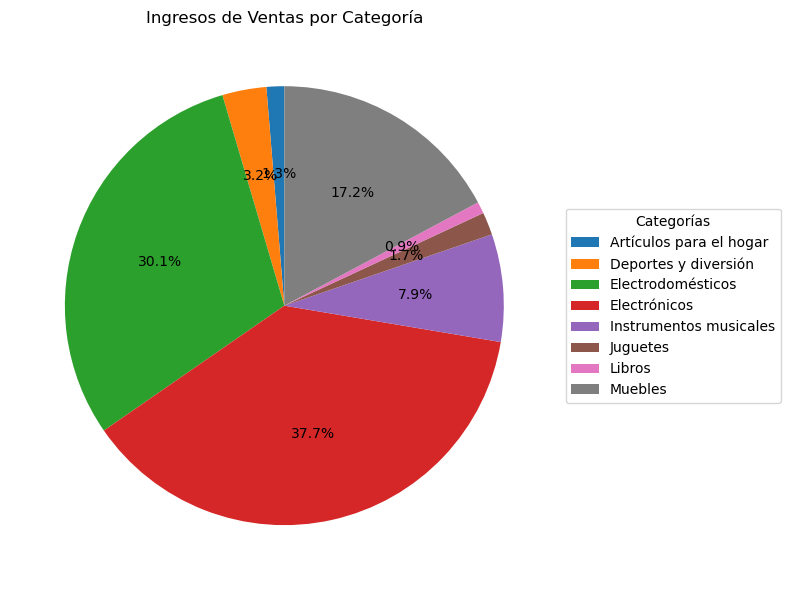

In [18]:
# Crear un grafico circular del porcentaje de ventas por categoría
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ingreso_total_categoria.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=None          
)

plt.legend(
    ingreso_total_categoria.index,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Ingresos de Ventas por Categoría")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [19]:
# Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.
calificaciones_promedio_tienda = df_combined.groupby('Tienda')['Calificación'].mean().round(2)
print("Calificaciones Promedio de los Clientes por Tienda:")
print(calificaciones_promedio_tienda)


Calificaciones Promedio de los Clientes por Tienda:
Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


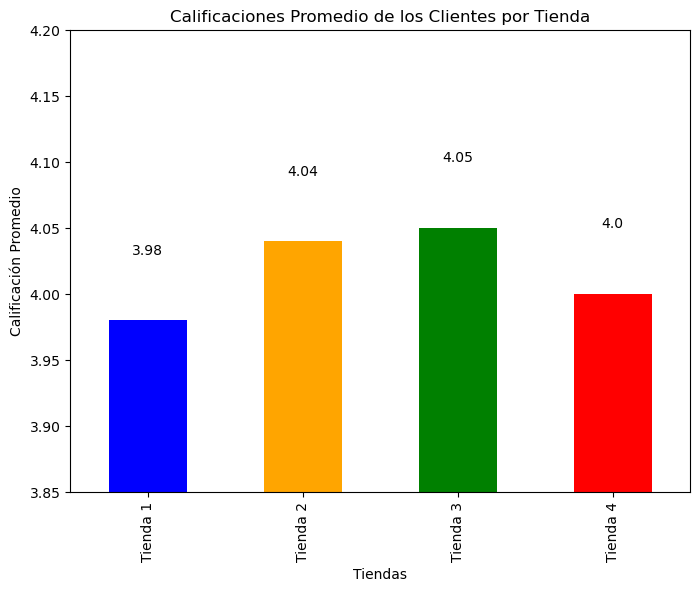

In [20]:
# Crear un grafico de barras para comparar las calificaciones promedio entre las tiendas y colocar etiquetas
plt.figure(figsize=(8, 6))
calificaciones_promedio_tienda.plot.bar(color=['blue', 'orange', 'green', 'red'])
plt.title("Calificaciones Promedio de los Clientes por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
for index, value in enumerate(calificaciones_promedio_tienda):
    plt.text(index, value + 0.05, str(value), ha='center')
plt.ylim(3.85, 4.2)
plt.show()
  

<Figure size 2000x600 with 0 Axes>

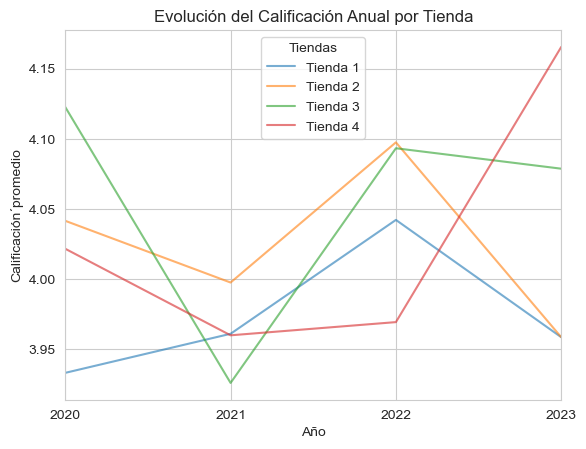

In [21]:
# Evolución del promedio de calificación a través de los años
df_combined_calif = df_combined.copy()

df_combined_calif['Fecha de Compra'] = pd.to_datetime(df_combined_calif['Fecha de Compra'])
df_combined_calif['Año'] = df_combined_calif['Fecha de Compra'].dt.to_period('Y')
calificacion_promedio_anual = df_combined_calif.groupby(['Año', 'Tienda'])['Calificación'].mean().unstack(fill_value=0)
calificacion_promedio_anual.index = calificacion_promedio_anual.index.to_timestamp()

plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
calificacion_promedio_anual.plot(kind='line', stacked=False, alpha=0.6)
plt.title("Evolución del Calificación Anual por Tienda")
plt.ylabel("Calificación´promedio")
plt.legend(title='Tiendas')
plt.show()


In [22]:
# Realizar una matriz de correlacion entre la calificación mensual promedio, costo promedio de envío, la cantidad de ventas mensuales y el valor total de ventas mensuales.
df_combined['Fecha de Compra'] = pd.to_datetime(df_combined['Fecha de Compra'])
df_combined['Año-Mes'] = df_combined['Fecha de Compra'].dt.to_period('M')
calificacion_promedio_mensual = df_combined.groupby('Año-Mes')['Calificación'].mean()
cantidad_ventas_mensual = df_combined.groupby('Año-Mes').size()
costo_promedio_envio_mensual = df_combined.groupby('Año-Mes')['Costo de envío'].mean()

valor_total_ventas_mensual = df_combined.groupby('Año-Mes')['Precio'].sum()
correlacion_matriz = pd.DataFrame({
    'Calificación Promedio': calificacion_promedio_mensual,
    'Cantidad de Ventas': cantidad_ventas_mensual,
    'Costo Promedio de Envío': costo_promedio_envio_mensual,
    'Valor Total de Ventas': valor_total_ventas_mensual
}).corr()
print("\nMatriz de correlación:")
print(correlacion_matriz.round(2))


Matriz de correlación:
                         Calificación Promedio  Cantidad de Ventas  Costo Promedio de Envío  Valor Total de Ventas
Calificación Promedio                     1.00                0.08                     0.06                   0.09
Cantidad de Ventas                        0.08                1.00                    -0.01                   0.66
Costo Promedio de Envío                   0.06               -0.01                     1.00                   0.75
Valor Total de Ventas                     0.09                0.66                     0.75                   1.00


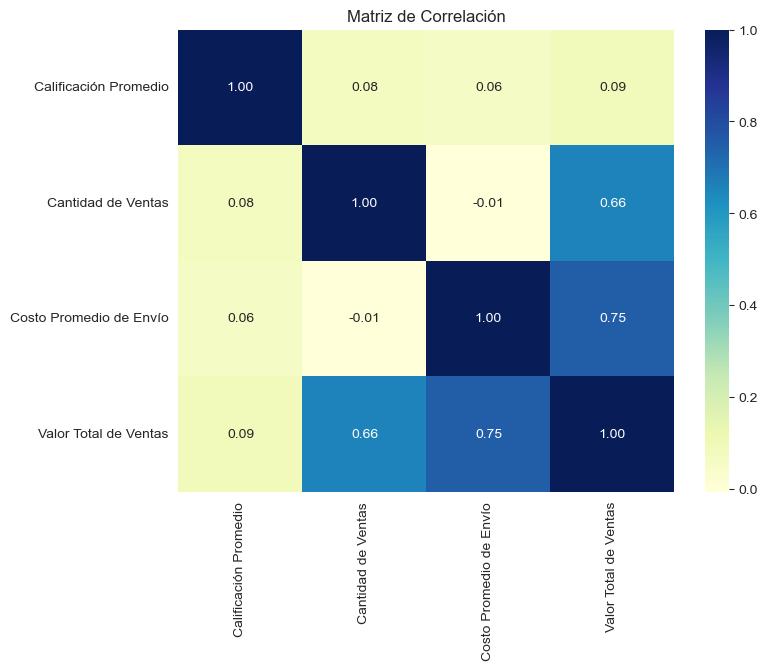

In [23]:
# Realizar un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_matriz, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Correlación")
plt.show()


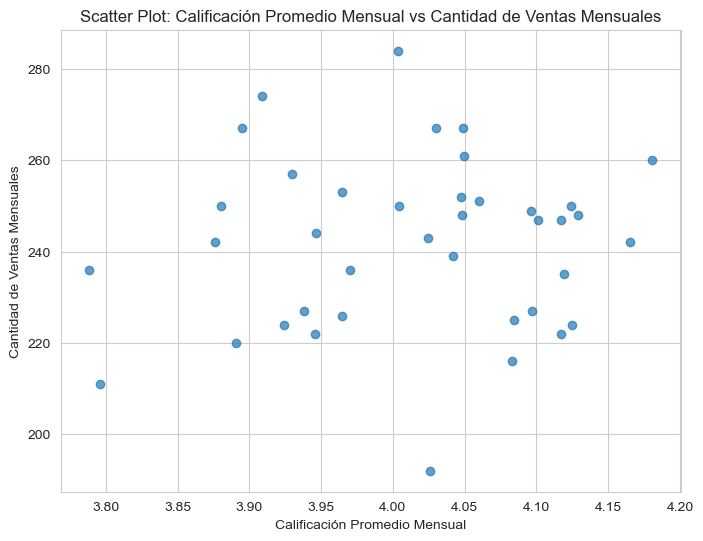

In [24]:
# Realizar un scatter plot entre la calificación promedio mensual y la cantidad de ventas mensuales para observar si existe alguna relación entre ambas variables.
plt.figure(figsize=(8, 6))
plt.scatter(calificacion_promedio_mensual, cantidad_ventas_mensual, alpha=0.7)
plt.title("Scatter Plot: Calificación Promedio Mensual vs Cantidad de Ventas Mensuales")
plt.xlabel("Calificación Promedio Mensual")
plt.ylabel("Cantidad de Ventas Mensuales")
plt.show()


# 4. Productos más y menos vendidos

In [25]:
#  Determinar cuales fueron los productos más y menos vendidos en cada tienda. Esto ayudará a identificar las preferencias de los clientes y optimizar el inventario.
productos_mas_vendidos_tienda1 = tienda['Producto'].value_counts().idxmax()
productos_menos_vendidos_tienda1 = tienda['Producto'].value_counts().idxmin()
productos_mas_vendidos_tienda2 = tienda2['Producto'].value_counts().idxmax()
productos_menos_vendidos_tienda2 = tienda2['Producto'].value_counts().idxmin()
productos_mas_vendidos_tienda3 = tienda3['Producto'].value_counts().idxmax()
productos_menos_vendidos_tienda3 = tienda3['Producto'].value_counts().idxmin()
productos_mas_vendidos_tienda4 = tienda4['Producto'].value_counts().idxmax()
productos_menos_vendidos_tienda4 = tienda4['Producto'].value_counts().idxmin()

# Imprimir los productos más y menos vendidos de cada tienda y la cantidad vendida
print(f"\nProducto más vendido en la tienda 1: {productos_mas_vendidos_tienda1 } (Cantidad: {tienda['Producto'].value_counts().max()})")
print(f"Producto menos vendido en la tienda 1: {productos_menos_vendidos_tienda1 } (Cantidad: {tienda['Producto'].value_counts().min()})")
print(f"\nProducto más vendido en la tienda 2: {productos_mas_vendidos_tienda2 } (Cantidad: {tienda2['Producto'].value_counts().max()})")
print(f"Producto menos vendido en la tienda 2: {productos_menos_vendidos_tienda2 } (Cantidad: {tienda2['Producto'].value_counts().min()})")
print(f"\nProducto más vendido en la tienda 3: {productos_mas_vendidos_tienda3 } (Cantidad: {tienda3['Producto'].value_counts().max()})")
print(f"Producto menos vendido en la tienda 3: {productos_menos_vendidos_tienda3 } (Cantidad: {tienda3['Producto'].value_counts().min()})")
print(f"\nProducto más vendido en la tienda 4: {productos_mas_vendidos_tienda4 } (Cantidad: {tienda4['Producto'].value_counts().max()})")
print(f"Producto menos vendido en la tienda 4: {productos_menos_vendidos_tienda4 } (Cantidad: {tienda4['Producto'].value_counts().min()})")

# Crear un diccionario con los resultados
resultados_productos = {
    'Tienda 1': {
        'Más Vendido': (productos_mas_vendidos_tienda1, tienda['Producto'].value_counts().max()),
        'Menos Vendido': (productos_menos_vendidos_tienda1, tienda['Producto'].value_counts().min())
    },
    'Tienda 2': {
        'Más Vendido': (productos_mas_vendidos_tienda2, tienda2['Producto'].value_counts().max()),
        'Menos Vendido': (productos_menos_vendidos_tienda2, tienda2['Producto'].value_counts().min())
    },
    'Tienda 3': {
        'Más Vendido': (productos_mas_vendidos_tienda3, tienda3['Producto'].value_counts().max()),
        'Menos Vendido': (productos_menos_vendidos_tienda3, tienda3['Producto'].value_counts().min())
    },
    'Tienda 4': {
        'Más Vendido': (productos_mas_vendidos_tienda4, tienda4['Producto'].value_counts().max()),
        'Menos Vendido': (productos_menos_vendidos_tienda4, tienda4['Producto'].value_counts().min())
    }
}


Producto más vendido en la tienda 1: Microondas (Cantidad: 60)
Producto menos vendido en la tienda 1: Auriculares con micrófono (Cantidad: 33)

Producto más vendido en la tienda 2: Iniciando en programación (Cantidad: 65)
Producto menos vendido en la tienda 2: Juego de mesa (Cantidad: 32)

Producto más vendido en la tienda 3: Kit de bancas (Cantidad: 57)
Producto menos vendido en la tienda 3: Bloques de construcción (Cantidad: 35)

Producto más vendido en la tienda 4: Cama box (Cantidad: 62)
Producto menos vendido en la tienda 4: Guitarra eléctrica (Cantidad: 33)


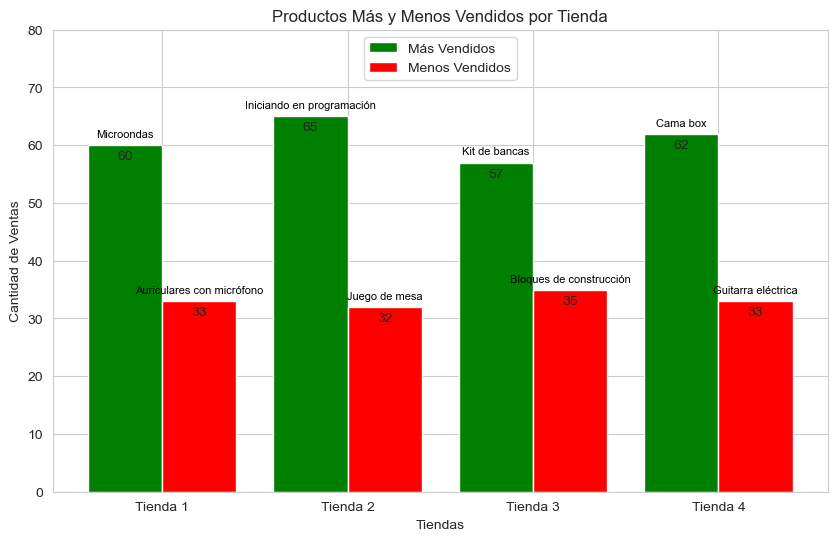

<Figure size 640x480 with 0 Axes>

In [26]:
# Visualizar los productos más y menos vendidos en cada tienda mediante un gráfico de barras verticales
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
mas_vendidos = [tienda['Producto'].value_counts().max(),
                 tienda2['Producto'].value_counts().max(),
                 tienda3['Producto'].value_counts().max(),
                 tienda4['Producto'].value_counts().max()]
menos_vendidos = [tienda['Producto'].value_counts().min(),
                    tienda2['Producto'].value_counts().min(),
                    tienda3['Producto'].value_counts().min(),
                    tienda4['Producto'].value_counts().min()]
x = range(len(tiendas))
plt.figure(figsize=(10, 6))
plt.bar(x, mas_vendidos, width=0.4, label='Más Vendidos', color='g', align='center')
plt.bar([p + 0.4 for p in x], menos_vendidos, width=0.4, label='Menos Vendidos', color='r', align='center')
plt.xticks([p + 0.2 for p in x], tiendas)

plt.ylim(0, max(mas_vendidos) + 15)
plt.xlabel('Tiendas')
plt.ylabel('Cantidad de Ventas')
plt.title('Productos Más y Menos Vendidos por Tienda')
plt.legend(loc='upper center')
for i in range(len(tiendas)):
    plt.text(i, mas_vendidos[i] -3, str(mas_vendidos[i]), ha='center', va='bottom')
    plt.text(i + 0.4, menos_vendidos[i] -3, str(menos_vendidos[i]), ha='center', va='bottom')
# Colocar las etiquetas de a que producto corresponde cada barra

for i, tienda_nombre in enumerate(tiendas):
    plt.text(i, mas_vendidos[i] + 1, resultados_productos[tienda_nombre]['Más Vendido'][0], ha='center', va='bottom', fontsize=8, color='black')
    plt.text(i + 0.4, menos_vendidos[i] + 1, resultados_productos[tienda_nombre]['Menos Vendido'][0], ha='center', va='bottom', fontsize=8, color='black')
plt.show()
plt.clf()


# 5. Envío promedio por tienda

In [27]:
# Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Imprimir los costos de envío promedio de cada tienda
print(f"\nCosto de envío promedio de la tienda 1: ${costo_envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio de la tienda 2: ${costo_envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio de la tienda 3: ${costo_envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio de la tienda 4: ${costo_envio_promedio_tienda4:.2f}")




Costo de envío promedio de la tienda 1: $26018.61
Costo de envío promedio de la tienda 2: $25216.24
Costo de envío promedio de la tienda 3: $24805.68
Costo de envío promedio de la tienda 4: $23459.46


C:\Users\User\AppData\Local\Temp\ipykernel_13104\3507043709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tiendas, y=costos_envio, palette=['blue', 'orange', 'green', 'red'])


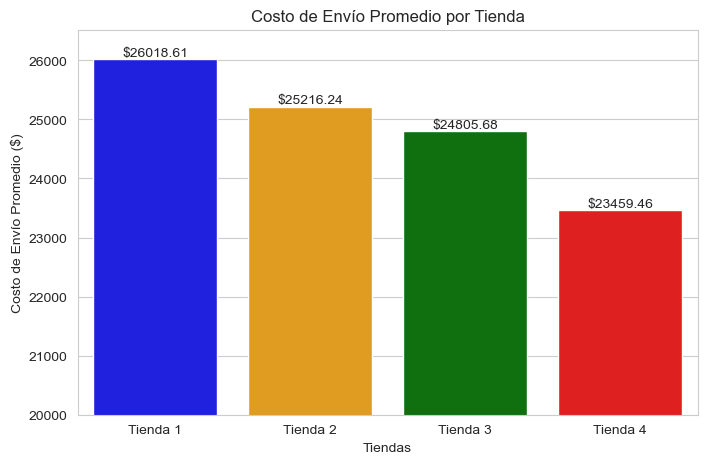

<Figure size 640x480 with 0 Axes>

In [49]:
# Crear un gráfico de barras para comparar los costos de envío promedio entre las tiendas
costos_envio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.figure(figsize=(8, 5))
sns.barplot(x=tiendas, y=costos_envio, palette=['blue', 'orange', 'green', 'red'])
plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de Envío Promedio ($)")
for i, costo in enumerate(costos_envio):
    plt.text(i, costo + 0.5, f"${costo:.2f}", ha='center', va='bottom')
plt.ylim(20000, max(costos_envio) + 500)
plt.show()
plt.clf()


## CREAR GRÁFICOS

### **GRÁFICO COMPLEMENTARIO 1 - MAPA DE CALOR POR UBICACIÓN GEOGRÁFICA**

In [29]:
# Crear un mapa de calor para visualizar la densidad de ventas por ubicación geográfica de las tiendas
import folium
import pandas as pd
from folium.plugins import HeatMap

mapa_calor = folium.Map(location=[4.5, -74], zoom_start=4)

heat_data = df_combined[['lat', 'lon']].values.tolist()

HeatMap(heat_data).add_to(mapa_calor)

mapa_calor


In [30]:
# Determinar pares lon y lat únicos de las tiendas y la cantidad de ventas en cada ubicación
ubicaciones_ventas = (df_combined
                       .groupby(['lat', 'lon'])
                       .size()
                       .reset_index(name='Cantidad de Ventas'))

data = [
    (-4.21528, -69.94056, "Leticia",),
    (1.21361, -77.28111, "Pasto"),
    (2.92730, -75.28189, "Neiva"),
    (3.43722, -76.52250, "Cali"),
    (3.86530, -67.92390, "Inírida"),
    (4.14200, -73.62664, "Villavicencio"),
    (4.53389, -75.68111, "Armenia"),
    (4.57937, -74.21682, "Facatativá"),
    (4.60971, -74.08175, "Bogotá"),
    (4.81333, -75.69611, "Pereira",),
    (5.06889, -75.51738, "Manizales"),
    (6.25184, -75.56359, "Medellín"),
    (7.12539, -73.11980, "Bucaramanga"),
    (7.89391, -72.50782, "Cúcuta"),
    (10.39972, -75.51444, "Cartagena",),
    (10.46314, -73.25322, "Valledupar"),
    (10.96854, -74.78132, "Barranquilla"),
    (11.24079, -74.19904, "Santa Marta"),
    (11.54444, -72.90722, "Riohacha")
]
# Agregar una columna a df_combined con el nombre de la ciudad correspondiente a cada par lon y lat segun dat

ciudades = pd.DataFrame(data, columns=['lat', 'lon', 'Ciudad'])
df_combined = pd.merge(df_combined, ciudades, on=['lat', 'lon'], how='left')
print(df_combined.head())

            Producto Categoría del Producto    Precio  Costo de envío Fecha de Compra         Vendedor Lugar de Compra  Calificación      Método de pago  Cantidad de cuotas       lat       lon    Tienda   Año  Mes  Año-Mes     Ciudad
0  Asistente virtual           Electrónicos  164300.0          6900.0      2021-01-16      Pedro Gomez          Bogotá             4  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  2021    1  2021-01     Bogotá
1    Mesa de comedor                Muebles  192300.0          8400.0      2022-05-18  Beatriz Morales        Medellín             1  Tarjeta de crédito                   4   6.25184 -75.56359  Tienda 1  2022    5  2022-05   Medellín
2      Juego de mesa               Juguetes  209600.0         15900.0      2021-03-15   Juan Fernandez       Cartagena             1  Tarjeta de crédito                   1  10.39972 -75.51444  Tienda 1  2021    3  2021-03  Cartagena
3         Microondas      Electrodomésticos  757500.0         41

In [31]:
# Determinar el valor de ventas por ciudad y tienda
valor_ventas = (
    df_combined
    .groupby(['Ciudad', 'Tienda'])['Precio']
    .sum()
    .div(1_000_000)
    .round(2)
    .reset_index(name='Ventas')
)


tabla_dinamica = valor_ventas.pivot(
    index='Tienda',
    columns='Ciudad',
    values='Ventas'
).fillna(0)

print(tabla_dinamica)

Ciudad    Armenia  Barranquilla  Bogotá  Bucaramanga    Cali  Cartagena  Cúcuta  Facatativá  Inírida  Leticia  Manizales  Medellín  Neiva  Pasto  Pereira  Riohacha  Santa Marta  Valledupar  Villavicencio
Tienda                                                                                                                                                                                                     
Tienda 1     4.62         32.91  440.00        17.58  154.49      22.30   37.88        4.13     2.72    14.67       8.03    296.86   3.49  15.00    56.21     18.51        13.20        1.12           7.16
Tienda 2     3.36         27.74  479.96        23.90  118.26      21.55   28.99        2.24     2.50    16.16       3.54    297.25   3.84  12.80    43.07     12.66        13.83        1.10           3.60
Tienda 3     3.98         36.77  475.56        23.54  109.29      34.14   25.17        2.80     1.33    19.21       6.50    250.58   4.36   6.80    62.50     19.03        12.85        

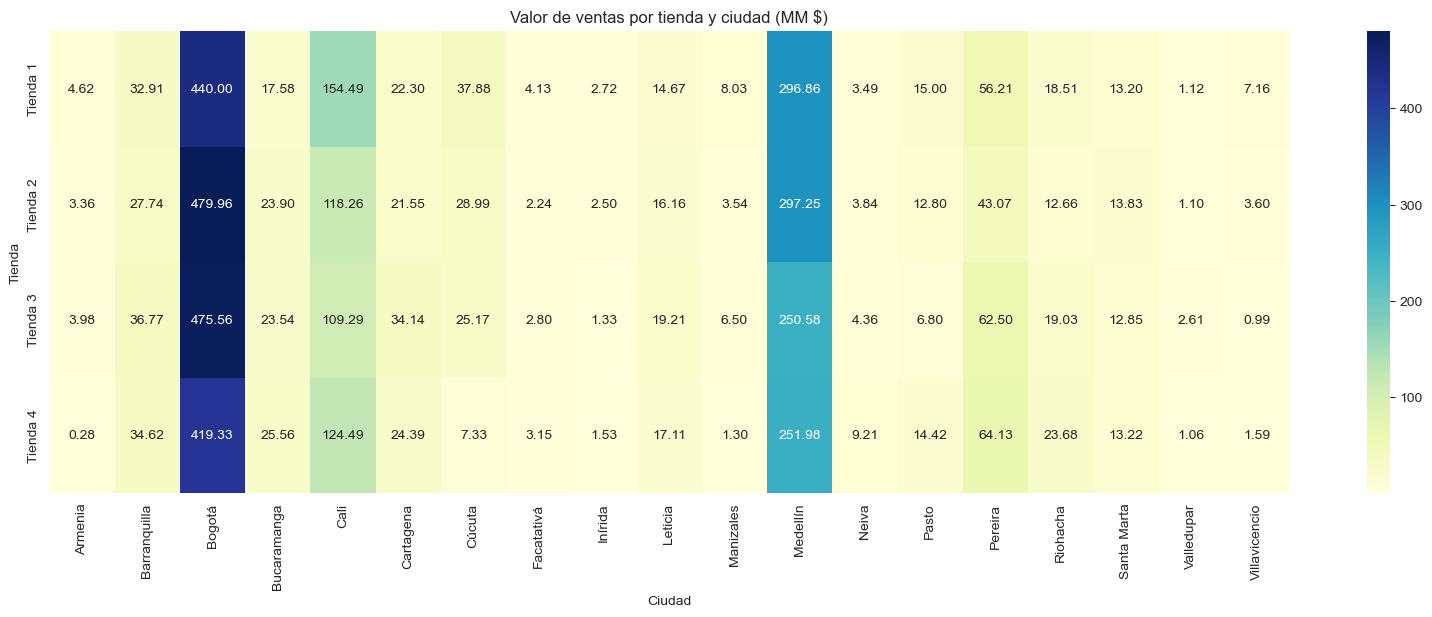

In [32]:
# Crear un heatmap de Tienda y Ciudad con cantidad de ventas

plt.figure(figsize=(20, 6))

sns.heatmap(
    tabla_dinamica,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu'
)
plt.title('Valor de ventas por tienda y ciudad (MM $)')
plt.show()

### **GRÁFICO COMPLEMENTARIO 2 - HEATMAP SOBRE VENTAS MESES VS AÑOS**

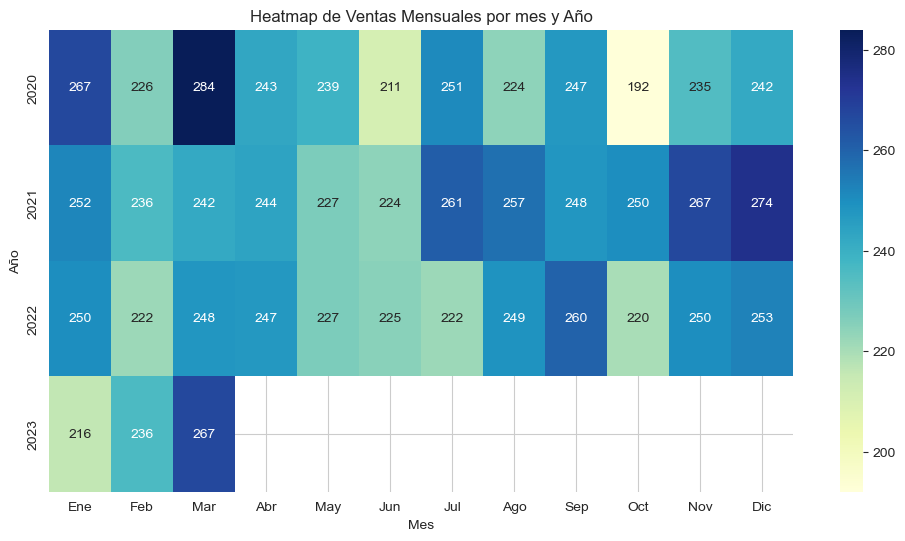

In [33]:
# Realizar un heatmap sobre los meses vs años con mayores ventas en todas las tiendas para identificar patrones estacionales en las ventas.

df_combined['Fecha de Compra'] = pd.to_datetime(df_combined['Fecha de Compra'])
df_combined['Año'] = df_combined['Fecha de Compra'].dt.year
df_combined['Mes'] = df_combined['Fecha de Compra'].dt.month
ventas_mensuales = df_combined.groupby(['Año', 'Mes']).size().unstack(fill_value=0)

min_no_cero = ventas_mensuales[ventas_mensuales > 0].min().min()

mask = ventas_mensuales == 0

plt.figure(figsize=(12, 6))


sns.heatmap(
    ventas_mensuales,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    mask=mask,          # Oculta los ceros
    vmin=min_no_cero    # Escala empieza desde el mínimo real
)

meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.xticks(
    ticks=[i + 0.5 for i in range(len(ventas_mensuales.columns))],
    labels=[meses[m - 1] for m in ventas_mensuales.columns],
    ha='center'
)
plt.title("Heatmap de Ventas Mensuales por mes y Año")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()



In [34]:
# Determinar top vendedores 
top_vendedores = (
                df_combined
                  .groupby(['Vendedor'])
                  .size()
                  .reset_index(name='Cantidad de Ventas')
                  )

top_vendedores = top_vendedores.sort_values(by='Cantidad de Ventas', ascending=False).reset_index(drop=True)
print("\nTop Vendedores por Cantidad de Ventas:")
print(top_vendedores.head(10))  # Mostrar top 10 vendedores



Top Vendedores por Cantidad de Ventas:
          Vendedor  Cantidad de Ventas
0  Izabela de León                 744
1    Felipe Santos                 701
2   Juan Fernandez                 694
3  Ángel Rodriguez                 684
4    Maria Alfonso                 679
5   Blanca Ramirez                 679
6    Juliana Costa                 677
7    Lucas Olivera                 674
8    Camila Rivera                 667
9  Mariana Herrera                 656


In [35]:
# Determinar el valor total por vendedor
valor_total_vendedor = df_combined.groupby(['Vendedor'])['Precio'].sum().reset_index(name='Valor Total de Ventas')
valor_total_vendedor = valor_total_vendedor.sort_values(by='Valor Total de Ventas', ascending=False).reset_index(drop=True)
print("\nTop Vendedores por Valor Total de Ventas:")
print(valor_total_vendedor.head(10))  # Mostrar top 10 vendedores


Top Vendedores por Valor Total de Ventas:
          Vendedor  Valor Total de Ventas
0    Felipe Santos            353796000.0
1  Izabela de León            350342400.0
2    Maria Alfonso            349694800.0
3    Juliana Costa            338364700.0
4      Pedro Gomez            313350900.0
5    Rafael Acosta            310292300.0
6   Juan Fernandez            308562100.0
7    Lucas Olivera            305403600.0
8    Camila Rivera            303184200.0
9  Beatriz Morales            302695600.0


### **GRÁFICO COMPLEMENTARIO 3 - BARRAS HORIZONTALES SOBRE DESEMPEÑO DE VENDEDORES**


Top Vendedores (únicos) por Cantidad y Valor Total de Ventas:
{'Beatriz Morales', 'Camila Rivera', 'Felipe Santos', 'Juliana Costa', 'Maria Alfonso', 'Blanca Ramirez', 'Mariana Herrera', 'Pedro Gomez', 'Ángel Rodriguez', 'Izabela de León', 'Juan Fernandez', 'Lucas Olivera', 'Rafael Acosta'}

Colores asignados a cada vendedor:
{'Beatriz Morales': '#8E24AA', 'Camila Rivera': '#000000', 'Felipe Santos': '#00ACC1', 'Juliana Costa': '#D81B60', 'Maria Alfonso': '#FDD835', 'Blanca Ramirez': '#E53935', 'Mariana Herrera': '#1E88E5', 'Pedro Gomez': '#6D4C41', 'Ángel Rodriguez': '#F48FB1', 'Izabela de León': '#C0CA33', 'Juan Fernandez': '#26A69A', 'Lucas Olivera': '#43A047', 'Rafael Acosta': '#0D47A1'}


C:\Users\User\AppData\Local\Temp\ipykernel_13104\1629272475.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Vendedor', data=top_vendedores.head(10), palette=[colores[v] for v in top_vendedores.head(10)['Vendedor']])
C:\Users\User\AppData\Local\Temp\ipykernel_13104\1629272475.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valor Total de Ventas', y='Vendedor', data=valor_total_vendedor.head(10), palette=[colores[v] for v in valor_total_vendedor.head(10)['Vendedor']])


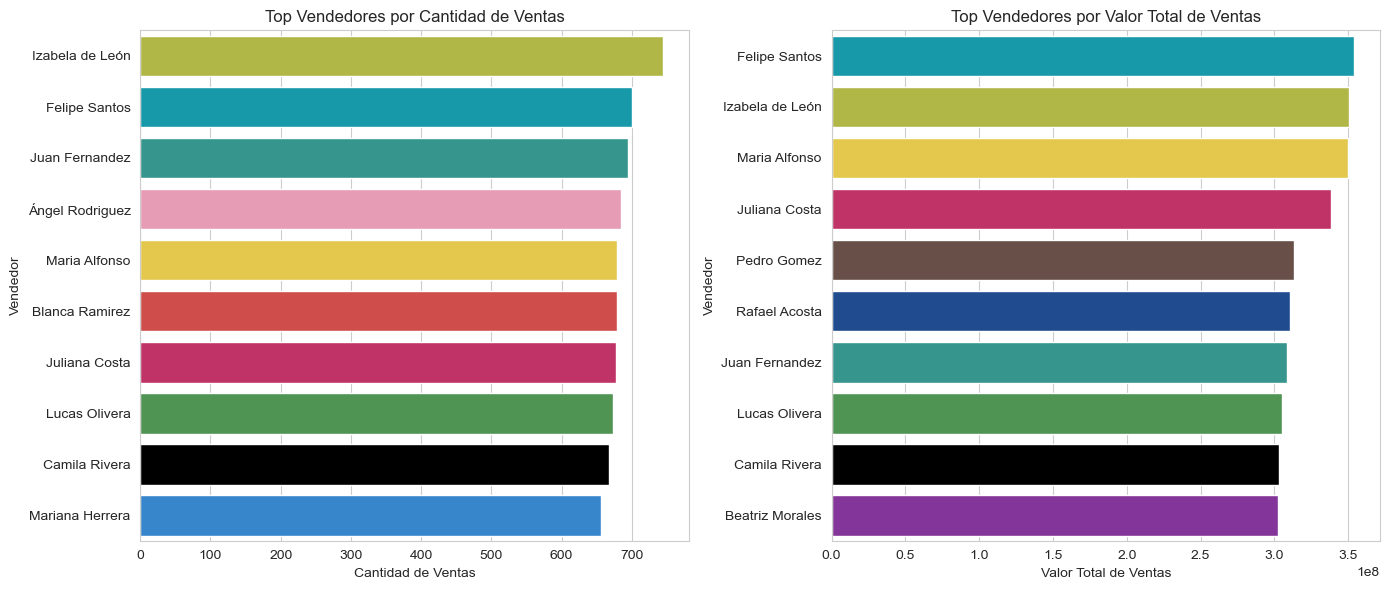

In [36]:
# Enlistar una sola lista con valores únicos para los top vendedores en valor y cantidad de ventas
op_vendedores_cantidad = set(top_vendedores.head(10)['Vendedor'].unique()).union(set(valor_total_vendedor.head(10)['Vendedor'].unique()))
print("\nTop Vendedores (únicos) por Cantidad y Valor Total de Ventas:")
print(op_vendedores_cantidad)

# Asignar un color a cada vendedor
import random
import matplotlib.pyplot as plt
colors = [
    "#E53935",  # Rojo
    "#1E88E5",  # Azul
    "#43A047",  # Verde
    "#FB8C00",  # Naranja
    "#8E24AA",  # Morado
    "#FDD835",  # Amarillo
    "#00ACC1",  # Cian
    "#D81B60",  # Magenta
    "#6D4C41",  # Marrón
    "#455A64",  # Gris oscuro
    "#C0CA33",  # Verde lima
    "#0D47A1",  # Azul marino
    "#F48FB1",  # Rosa claro
    "#26A69A",  # Turquesa
    "#000000"   # Negro
]
colores = {}

# Asignar colores aleatoriamente a cada vendedor sin repetir
random.shuffle(colors)
for i, vendedor in enumerate(op_vendedores_cantidad):
    colores[vendedor] = colors[i % len(colors)]
    
print("\nColores asignados a cada vendedor:")
print(colores)
# Visualizar los top vendedores por cantidad y valor total de ventas en dos gráficos de barras horizontales
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Cantidad de Ventas', y='Vendedor', data=top_vendedores.head(10), palette=[colores[v] for v in top_vendedores.head(10)['Vendedor']])
plt.title("Top Vendedores por Cantidad de Ventas")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Vendedor")

plt.subplot(1, 2, 2)
sns.barplot(x='Valor Total de Ventas', y='Vendedor', data=valor_total_vendedor.head(10), palette=[colores[v] for v in valor_total_vendedor.head(10)['Vendedor']])
plt.title("Top Vendedores por Valor Total de Ventas")
plt.xlabel("Valor Total de Ventas")
plt.ylabel("Vendedor")
plt.tight_layout()
plt.show()

### **GRÁFICOS COMPLEMENTARIO 4 - EVOLUCIÓN DE VALOR DE LAS VENTAS**

<Figure size 2000x600 with 0 Axes>

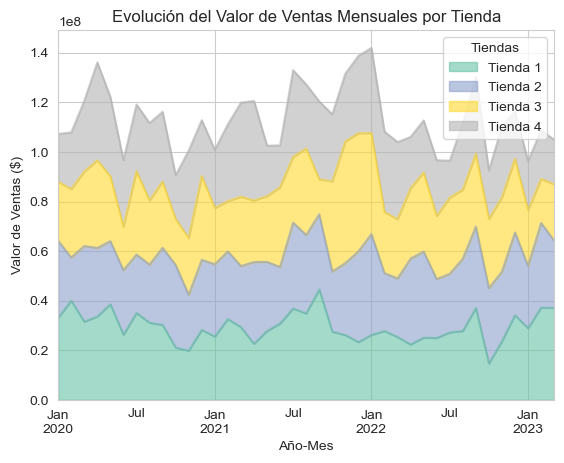

In [37]:
# Relizar un gráfico de areas de evolucion del valor de ventas mensuales por tienda a lo largo del tiempo para identificar tendencias y patrones de crecimiento. CON SEABORN
df_combined['Fecha de Compra'] = pd.to_datetime(df_combined['Fecha de Compra'])
df_combined['Año-Mes'] = df_combined['Fecha de Compra'].dt.to_period('M')
ventas_mensuales_tienda = df_combined.groupby(['Año-Mes', 'Tienda'])['Precio'].sum().unstack(fill_value=0)
ventas_mensuales_tienda.index = ventas_mensuales_tienda.index.to_timestamp()

plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
ventas_mensuales_tienda.plot(kind='area', stacked=True, alpha=0.6, colormap='Set2')
plt.title("Evolución del Valor de Ventas Mensuales por Tienda")
plt.ylabel("Valor de Ventas ($)")
plt.legend(title='Tiendas')
plt.show()



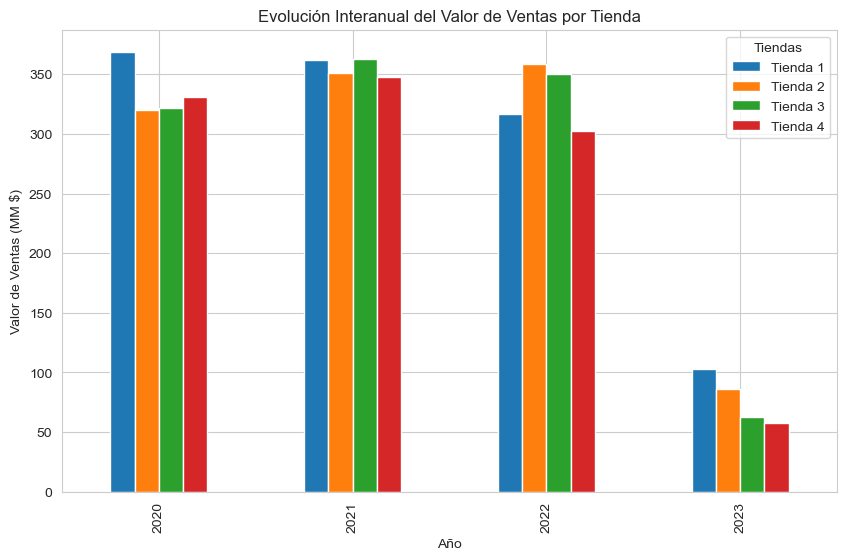

In [38]:
#  Realizar un gráfico barras de la evolución interanual del valor de ventas
df_combined['Año'] = df_combined['Fecha de Compra'].dt.year

# Ventas anuales en Millones de $
ventas_anuales = df_combined.groupby(['Año', 'Tienda'])['Precio'].sum().unstack(fill_value=0).div(1_000_000)
ventas_anuales.plot(kind='bar', figsize=(10, 6))
plt.title("Evolución Interanual del Valor de Ventas por Tienda")
plt.ylabel("Valor de Ventas (MM $)")
plt.xlabel("Año")
plt.legend(title='Tiendas')
plt.show()


<Figure size 2000x600 with 0 Axes>

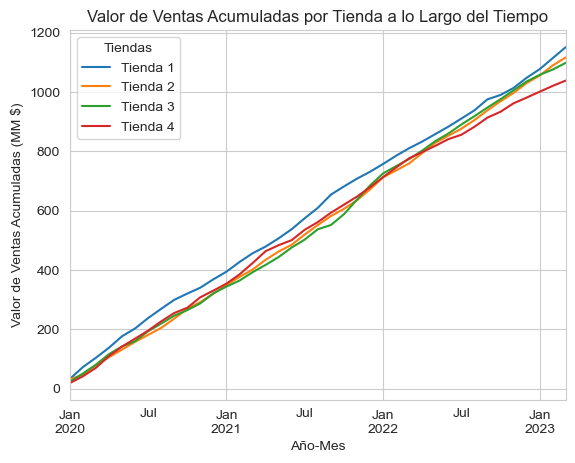

In [39]:
# Crear un grafico de valor de ventas acumuladas por tienda a lo largo del tiempo para analizar el crecimiento sostenido de las ventas.

df_combined['Fecha de Compra'] = pd.to_datetime(df_combined['Fecha de Compra'])
df_combined['Año-Mes'] = df_combined['Fecha de Compra'].dt.to_period('M')
ventas_mensuales_tienda = df_combined.groupby(['Año-Mes', 'Tienda'])['Precio'].sum().unstack(fill_value=0).div(1_000_000)
ventas_acumuladas_tienda = ventas_mensuales_tienda.cumsum()
plt.figure(figsize=(20, 6))
ventas_acumuladas_tienda.plot()
plt.title("Valor de Ventas Acumuladas por Tienda a lo Largo del Tiempo")
plt.ylabel("Valor de Ventas Acumuladas (MM $)")
plt.legend(title='Tiendas')
plt.show()

### **GRÁFICOS COMPLEMENTARIO 5 - MÉTODO DE PAGO Y COSTO DE ENVÍO**

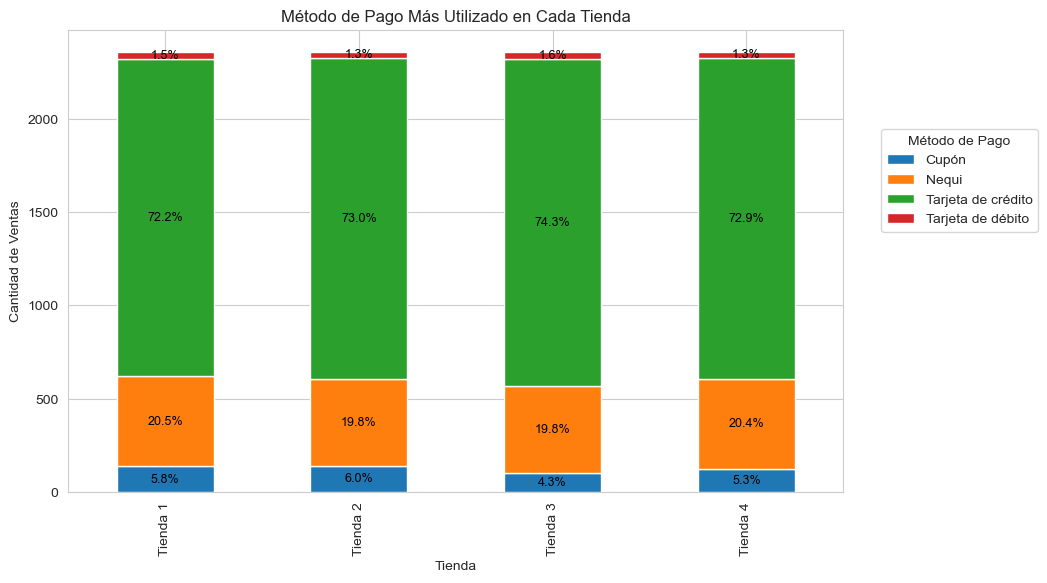

In [40]:
# Crear un gráfico para visualizar el metodo de pago más utilizado en cada tienda y su proporción respecto al total de ventas. Con etiquetas
metodo_pago_tienda = df_combined.groupby(['Tienda', 'Método de pago']).size().unstack(fill_value=0)
metodo_pago_tienda.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Método de Pago Más Utilizado en Cada Tienda")
plt.ylabel("Cantidad de Ventas")

plt.legend(title='Método de Pago', loc='upper center', bbox_to_anchor=(1.15, 0.8))

for i, tienda in enumerate(metodo_pago_tienda.index):
    total_ventas = metodo_pago_tienda.loc[tienda].sum()
    acumulado = 0
    for metodo in metodo_pago_tienda.columns:
        cantidad = metodo_pago_tienda.loc[tienda, metodo]
        if cantidad > 0:
            porcentaje = (cantidad / total_ventas) * 100
            plt.text(i, acumulado + cantidad / 2, f"{porcentaje:.1f}%", ha='center', va='center', color='black', fontsize=9)
            acumulado += cantidad

plt.show()



Costo de Envío Promedio para Electrónicos, Electrodomésticos y Muebles por Tienda:
Categoría del Producto  Tienda  
Electrodomésticos       Tienda 1    61935.90
                        Tienda 2    60838.03
                        Tienda 3    62928.78
                        Tienda 4    59143.70
Electrónicos            Tienda 1    51258.26
                        Tienda 2    51692.42
                        Tienda 3    48460.98
                        Tienda 4    48399.78
Muebles                 Tienda 1    21494.41
                        Tienda 2    21348.64
                        Tienda 3    21611.42
                        Tienda 4    21323.54
Name: Costo de envío, dtype: float64


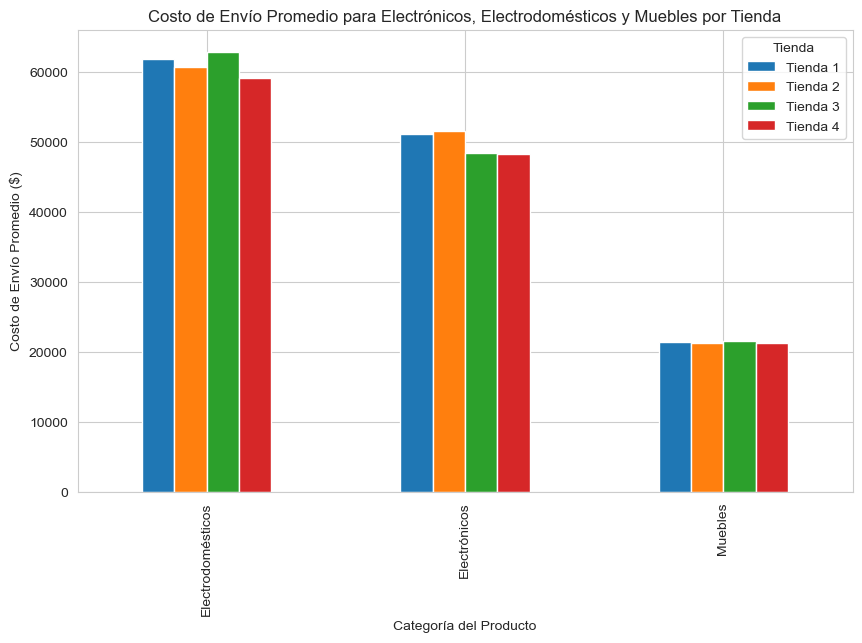

In [41]:
# Determinar cual es el costo de envío promedio para electrónicos, electrodomésticos y muebles para cada tienda.
categorias = ['Electrónicos', 'Electrodomésticos', 'Muebles']
costo_envio_promedio_categorias = df_combined[df_combined['Categoría del Producto'].isin(categorias)].groupby(['Categoría del Producto', 'Tienda'])['Costo de envío'].mean().round(2)
print("\nCosto de Envío Promedio para Electrónicos, Electrodomésticos y Muebles por Tienda:")
print(costo_envio_promedio_categorias)


pd.melt(costo_envio_promedio_categorias.reset_index(), id_vars=['Categoría del Producto', 'Tienda'], value_name='Costo de Envío Promedio').pivot(index='Categoría del Producto', columns='Tienda', values='Costo de Envío Promedio').plot(kind='bar', figsize=(10, 6))
plt.title("Costo de Envío Promedio para Electrónicos, Electrodomésticos y Muebles por Tienda")
plt.ylabel("Costo de Envío Promedio ($)")
plt.show()


In [42]:
# Determinar el ratio precio/costo de envío por tienda y categoría Electrodomésticos, electrónicos, muebles
df_combined_fixed = df_combined[df_combined['Costo de envío'] > 0].copy()
df_combined_fixed['ratio_precio_envio'] = (df_combined_fixed['Costo de envío'] / df_combined_fixed['Precio'])
promedio_ratio_precio_envio = (
    df_combined_fixed
    .groupby(['Tienda', 'Categoría del Producto'])['ratio_precio_envio']
    .mean()
    .multiply(100) # porcentaje de venta
    .round(1)
    .reset_index()
)

# Evitar divisiones por 0


tabla_dinamica_2 = promedio_ratio_precio_envio.pivot(
    index='Tienda',
    columns='Categoría del Producto',
    values='ratio_precio_envio'
).fillna(0)

print(tabla_dinamica_2)

Categoría del Producto  Artículos para el hogar  Deportes y diversión  Electrodomésticos  Electrónicos  Instrumentos musicales  Juguetes  Libros  Muebles
Tienda                                                                                                                                                   
Tienda 1                                    6.0                   7.5                5.3           5.4                     5.5       8.4     6.8      5.3
Tienda 2                                    6.6                   7.9                5.3           5.2                     5.4       9.1     6.8      5.4
Tienda 3                                    6.3                   6.7                5.3           5.3                     5.4       7.8     6.4      5.4
Tienda 4                                    6.9                   6.6                5.3           5.3                     5.3       8.1     7.2      5.3


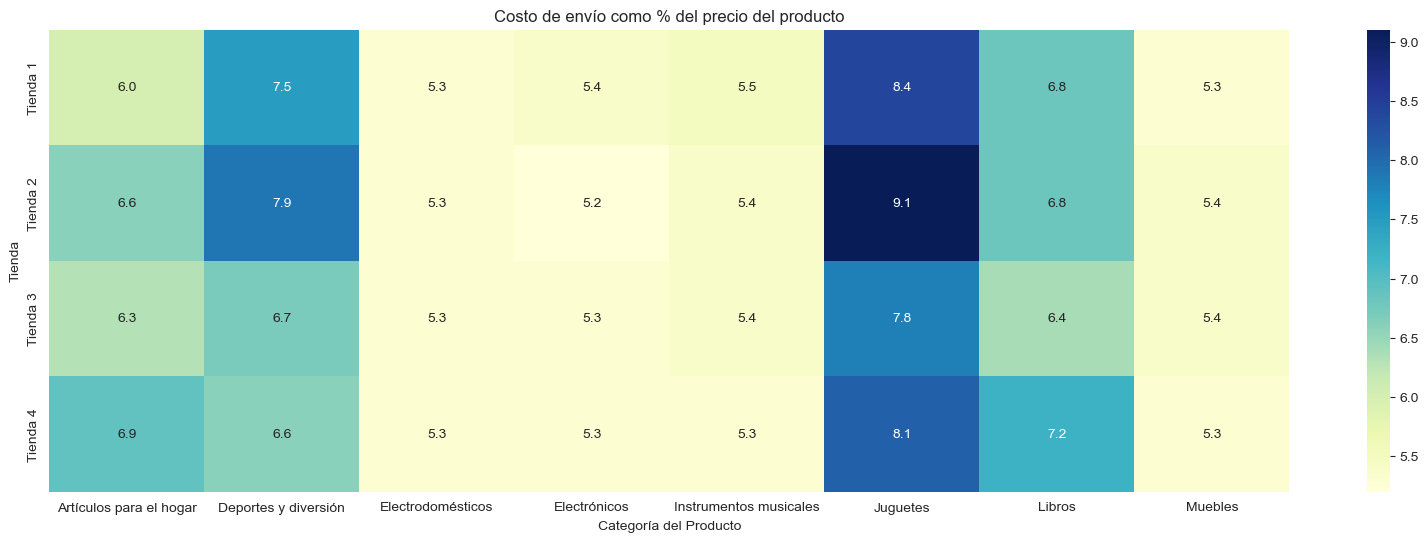

In [43]:
# Crear un heatmap de Tienda y Ciudad con cantidad de ventas

plt.figure(figsize=(20, 6))

sns.heatmap(
    tabla_dinamica_2,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu'
)
plt.title('Costo de envío como % del precio del producto')
plt.show()

# 📊 Informe Final de Análisis de Tiendas  
**Recomendación para el Sr. Juan**

---

## 1. Introducción

El presente informe tiene como objetivo analizar el desempeño de las diferentes tiendas disponibles para determinar **cuál de ellas debería vender el Sr. Juan** para poder invertir el dinero en otro negocio.  

Para ello, se realizó un análisis integral considerando los siguientes factores negocio:

- Ingresos totales por tienda  
- Categorías de productos más y menos vendidas  
- Productos más y menos vendidos  
- Calificaciones promedio otorgadas por los clientes  
- Coste promedio de envío por tienda  

Para realizar la evaluación y determinación de qué tienda se debería vender se consideraron los siguientes factores:

- Facturación (Ingresos totales por tienda)
- Variación interanual de ingresos y participación porcentual de ingresos
- Califiación promedio de la tienda

A partir de estos indicadores y de las visualizaciones generadas, se busca identificar la tienda que presenta **el menor desempeño en rentabilidad, satisfacción del cliente y evolución interanual**.

---

## 2. Ingresos Totales por Tienda

En primer lugar, se analizaron los **ingresos totales generados por cada tienda**, ya que este indicador refleja el volumen de negocio y el potencial de ventas.

📌 **Gráfico:** Ingresos totales por tienda  

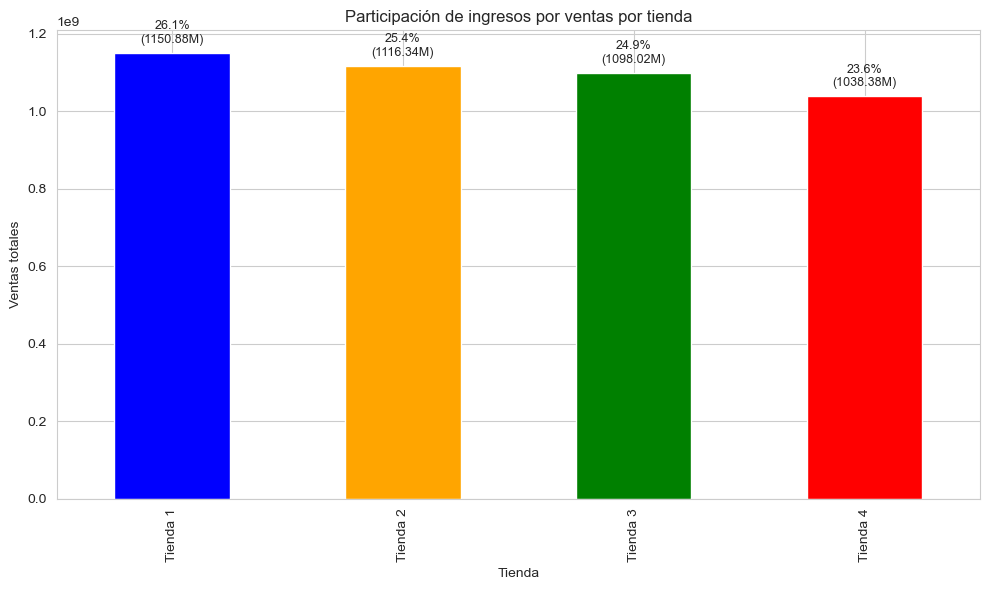

**Análisis:**
- La tienda 1 demuestra una mayor capacidad de generación ingresos de ventas (26.1).
- La tienda 4 fue la que representó la tienda con menor participación en los ingresos (23.6%).

---

## 3. Categorías de Productos Más y Menos Vendidas

Posteriormente, se evaluó la distribución de ventas por **categoría de producto**, lo cual permite identificar patrones de consumo y especialización de cada tienda.

📌 **Gráfico:**  Cantidad de Ventas por categoría de producto y tienda  

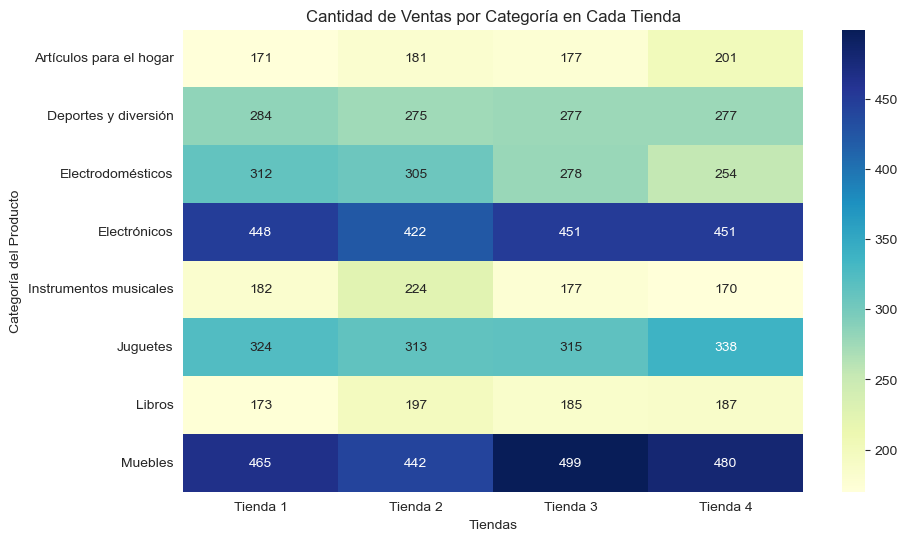

📌 **Gráfico:**  Valor de ingresos por ventas por categoría y tienda 

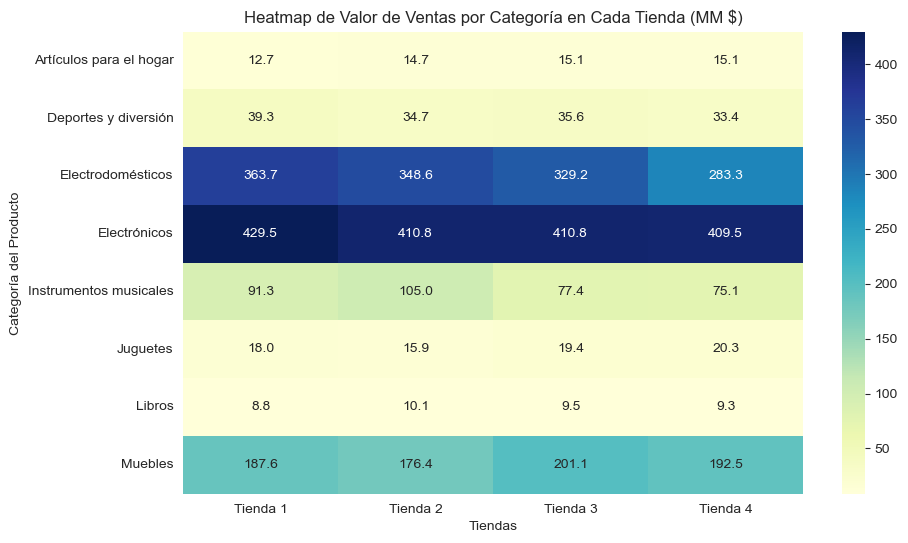

📌 **Gráfico:**  Ingresos de Ventas por Categoría 

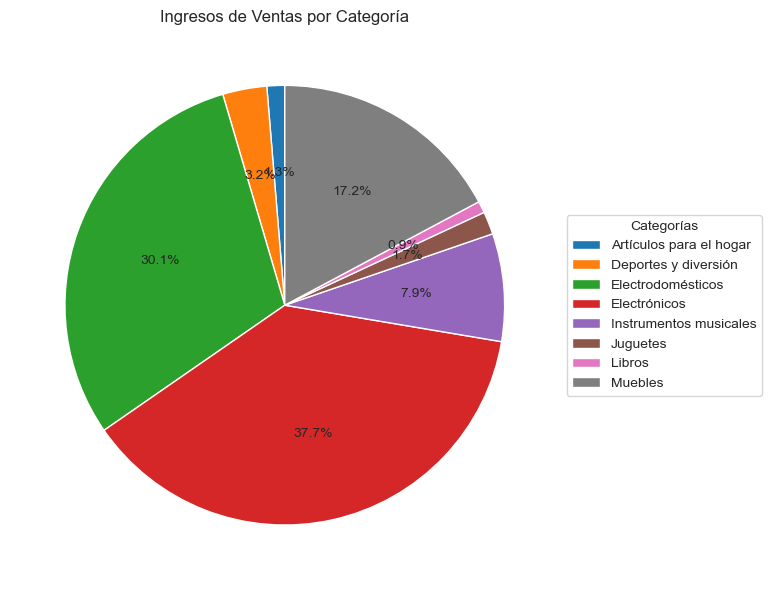

**Análisis:**
- Podemos identificar que las categorías que más ventas generan son Muebles, Electrónicos y Juguetes.
- Asimismo, la categoría que más ingresos por ventas genera son Electrónicos, Electrodomésticos y Muebles.
- La categoría más importante entre las tiendas es electrónicos ya que es el mayor aportante de ingresos y mueve gran volumen.
- Otra categoría a considerar es electrodomésticos que, a pesar de no generar tanta cantidad de ventas, aporta significativamente a los ingresos.
- Podemos identificar que la Tienda 4 es la que realiza menos venta de electrodomésticos frente a las demás tiendas.

---

## 4. Productos Más y Menos Vendidos

Se analizaron también los **productos individuales con mayor y menor volumen de ventas**, lo cual ayuda a comprender el comportamiento del consumidor a un nivel más específico.

📌 **Gráfico:** Productos más y menos vendidos  

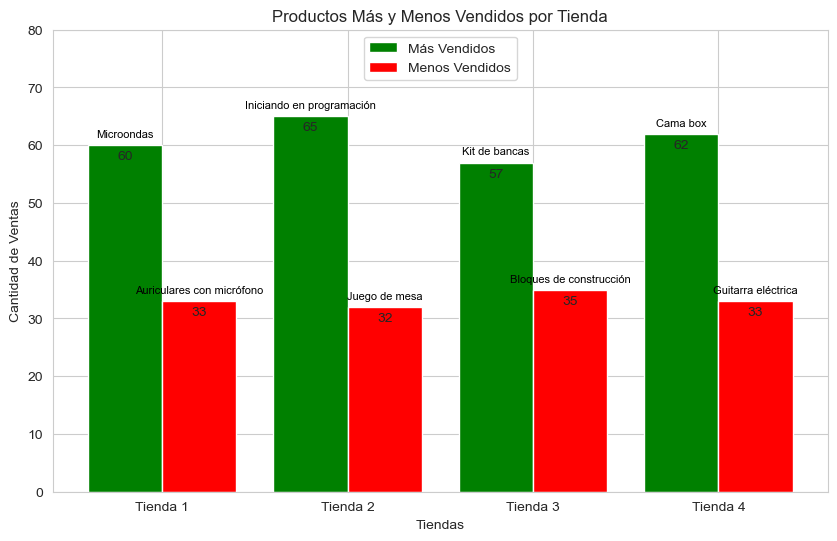

**Análisis:**
- Podemos identificar que las categorías que en la Tienda 1 el producto más vendido un electrodoméstico (microondas).
- La tienda 4 es especialista en muebles, y queda demostrado en el producto con más ventas (cama box).

---

## 5. Calificación Promedio de los Clientes por Tienda

La satisfacción del cliente es un factor clave para la sostenibilidad del negocio. Por ello, se evaluaron las **calificaciones promedio otorgadas por los clientes a cada tienda**.

📌 **Gráfico:** Calificación promedio por tienda  

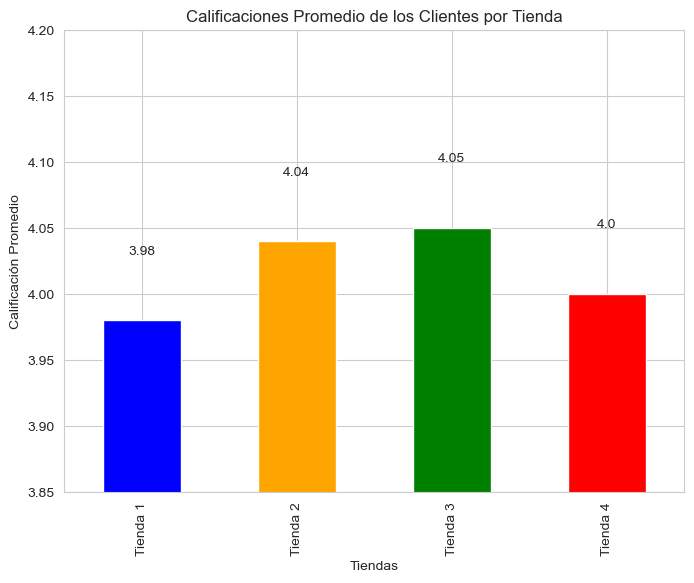

📌 **Gráfico:** Matriz de correlación entre cantidad de ventas mensual, ingreso por ventas mensual y calificación promedio mensual  

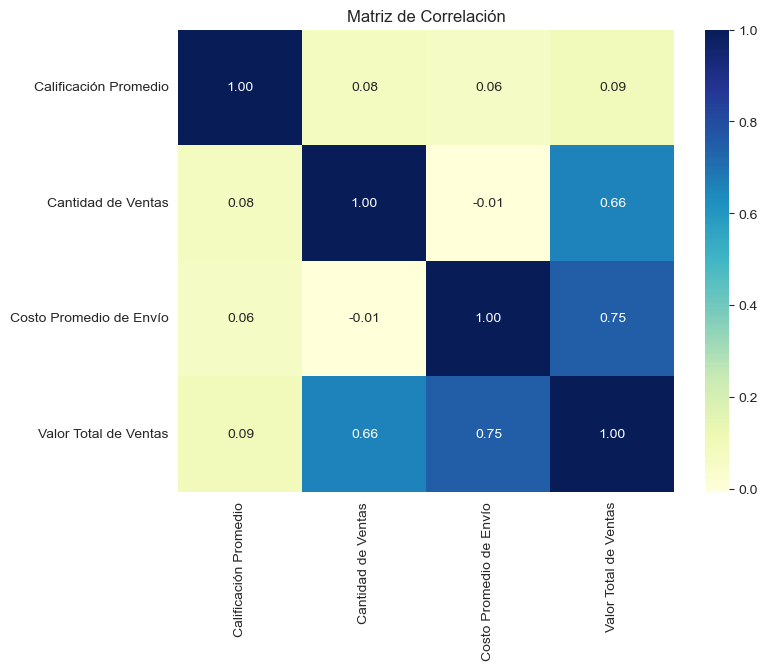

**Análisis:**
- Una mayor calificación promedio indica mejor experiencia del cliente, por lo que podemos decir que las tiendas 2 y 3 muestran un índice de prosperidad.
- Tiendas con calificaciones bajas (tienda 1 y 4) pueden enfrentar problemas de servicio, calidad o logística.
- Este indicador sería cobraría relevancia en la medida que tuviera una fuerte correlación con la cantidad de ventas o el ingreso mensual de ventas..

---

## 6. Coste Promedio de Envío por Tienda

Finalmente, se analizó el **coste promedio de envío**, dado que impacta directamente en la competitividad de precios y en la percepción del cliente.

📌 **Gráfico:** Coste promedio de envío por tienda  

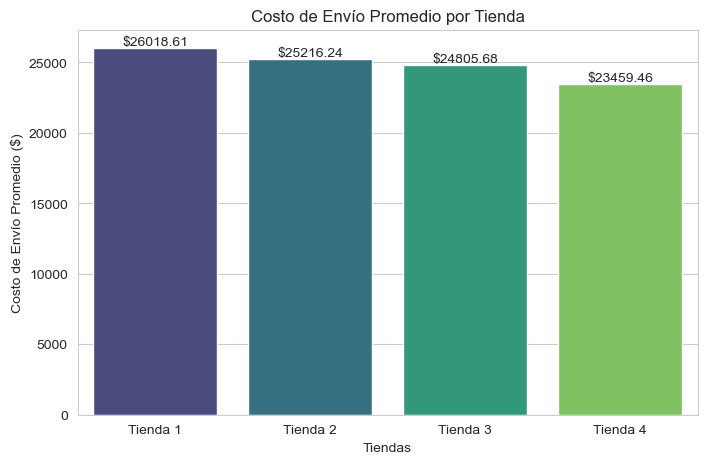

**Análisis:**
- Un menor coste de envío representa una ventaja competitiva, por lo que la tienda 4 tiene una posición ventaja.
- Costes elevados pueden reducir la rentabilidad o afectar la decisión de compra del cliente. La tienda 1 presenta una desventaja en este aspecto.
- En la matriz de correlación evidenciamos una fuerte correlación entre el Costo Promedio de envío tiene una fuerte correlación con el valor total de ventas, esto debido a que siempre al haber más valor de ventas.
- También evidenciamos una correlación practicamente nula entre la cantidad de ventas y el costo promedio de envío. Desestimando el como un factor relevante que afecte a la cantidad de ventas realizadas.

---
# Otros análisis realizados:

## 7. Variación interanual de valor de ventas por tienda y participación porcentual de ingresos

La variación interanual nos indica la evolución de los ingresos y la tendencia sobre la rentabilidad de cada tienda. Por lo que se evaluó **la variación interanual porcentual del valor de ventas**. Esto va asociado al porcentaje de participación que cada tienda demuestra en cada periodo así que también se analizó **la participación porcentual anual de los ingresos por año**.

📌 **Gráfico:** Variación interanual porcentual del valor de ventas  

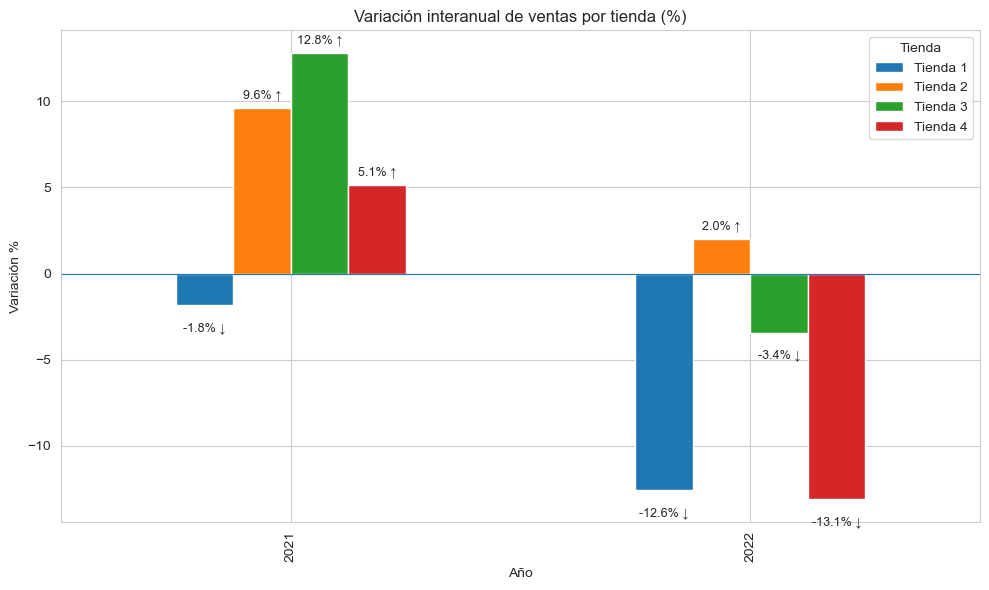

📌 **Gráfico:** Participación porcentual anual de los ingresos por año y tienda

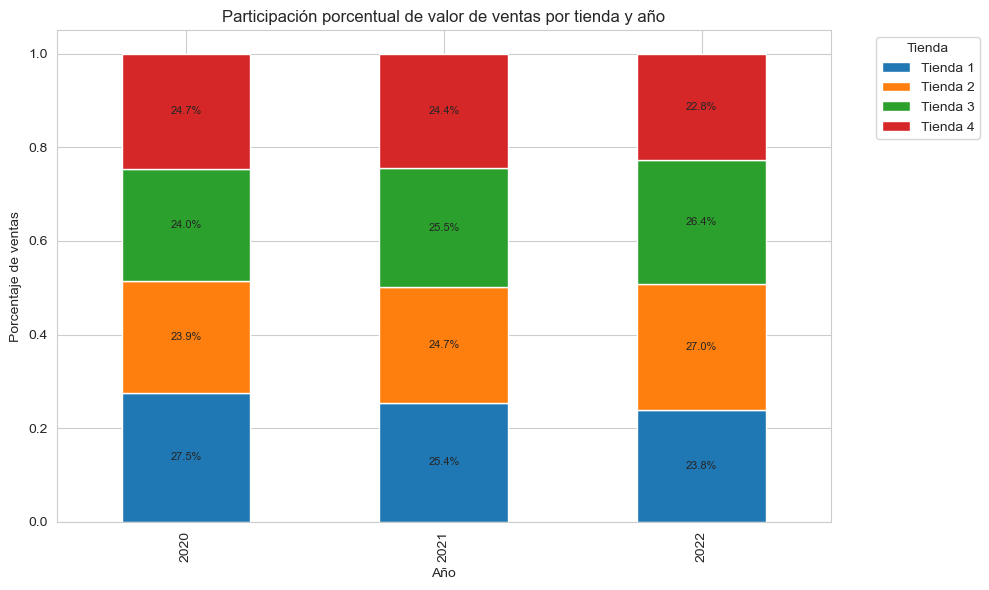

📌 **Gráfico:** Valor de ventas acumulado por tienda

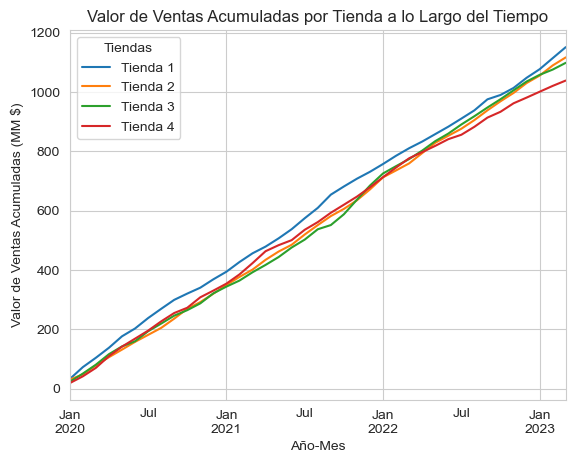
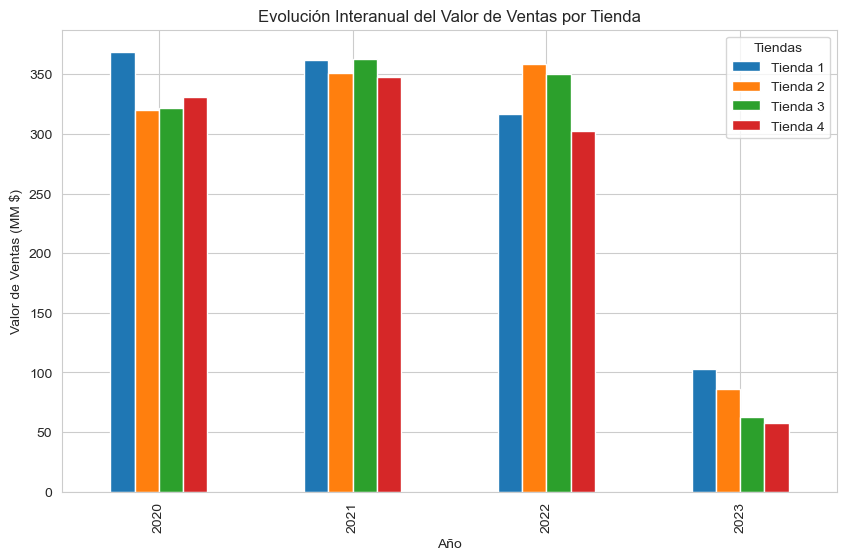

**Análisis:**
- Las tiendas 2 y 3 mostraron un incremento sustancial entre el año 2020 y 2021.
- El año 2022 golpeó duramente a las ventas, por lo que 3 de las tiendas mostraron una variación negativa.
- La tienda 4 fue la que tuvo una variación negativa mayor, sin emabargo el 2022 fue el segundo año en el que la Tienda 1 demuestra una tendencia negativa pero tendencia positiva amplia en el primer trimestre de 2023.
- Así podemos evidenciar que las tiendas 2 y 3 abarcan la mayor parte de la composición de los ingresos mientras que la Tienda 1 y 4 van reduciendo su participación.
- De manera general, en el valor de ventas acumuladas en el línea de tiempo, la tienda 4 es considerablemente menor frente a las demás tiendas, y con una tendencia negativa últimamente.

## 8. Análisis Integral y Comparación de Tiendas

A partir de todos los indicadores analizados, se realizó una comparación global considerando:

- Rentabilidad (ingresos totales)
- Demanda (ventas por categoría)
- Satisfacción del cliente (calificaciones)
- Ccoste de envío

**Fortalezas y debilidades identificadas:**
- **Tienda 1:** Mayor aporte a los ingresos, mayor venta de electrónicos, menor calificación promedio, mayor costo promedio de envío, variación interanual de valor de ventas con tendencia negativa por segundo año, tendencia positiva amplia en el primer trimestre de 2023.
- **Tienda 2:**  Segundo mejor aportante de ingresos, crecimiento interanual positivo por dos años consecutivos, y segundo mejor en calificación. 
- **Tienda 3:** Mejor calificación general, 2021 con mejor crecimiento, 2022 con crecimiento negativo ligero, aporte a ingresos similar a tienda 2.
- **Tienda 4:** Menor aportante, gran tendencia negativa de ingresos en 2022, segunda tienda en menor calificación promedio, menor en  valor de ventas de electrónicos y electrodomésticos. 

---

## 9. Conclusión y Recomendación Final

Con base en el análisis de los datos y las visualizaciones realizadas, se concluye que **la tienda más conveniente para que el Sr. Juan venda es la:**

### 📉💰 **TIENDA 4**

**Justificación:**
- Presenta los **menores ingresos totales**.
- Se desempeña desfavorablemente en las **categorías de productos más demandadas** (electrónicos y electrodomésticos).
- Cuenta con **calificaciones promedio bajas**, reflejando satisfacción del cliente.
- Demuestra una **evolución interanual negativa**, sin indicios de mejora en el último trimestre.

En conjunto, estos factores hacen que esta tienda se muestre frente a las demás y represente la **mejor opción estratégica para venderse** y poder destinar el capital en negocios de mejor rentabilidad y desempeño.
